<a href="https://colab.research.google.com/github/isharridho/Football-Analytics/blob/main/ShotsMap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.utils import FontManager

In [73]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Study Case 2_ xG Kualfikasi Piala AFC U20 2023 _ Indonesia VS Timor Leste - Dataset.csv')
df.head()

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
0,Indonesia,0,NaN,Game Start,NaN,NaN,0.0,NaN,Notes:
1,Timor Leste,0,NaN,Game Start,NaN,NaN,0.0,NaN,1. Ganti nomor punggung pemain dengan nama pem...
2,IDN,10%,17,Diblok,88.1,31.4,1.0,NaN,2. Lakukan penyesuaian nama tim menjadi satu v...
3,IDN,7%,20,Diamankan,93.3,70.2,2.0,NaN,3. Lakukan penyesuaian nama momentum di lapang...
4,IDN,15%,20,Diblok,87.2,54.3,2.0,NaN,4. Konversi nilai xG menjadi angka desimal 2 a...


In [76]:
df.columns

Index(['Team', 'xG', 'Player', 'Event', 'x', 'y', 'Minutes', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [77]:
df.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [78]:
df.head()

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0,NaN,Game Start,NaN,NaN,0.0
1,Timor Leste,0,NaN,Game Start,NaN,NaN,0.0
2,IDN,10%,17,Diblok,88.1,31.4,1.0
3,IDN,7%,20,Diamankan,93.3,70.2,2.0
4,IDN,15%,20,Diblok,87.2,54.3,2.0


In [79]:
df = df.iloc[:38]
df

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0,NaN,Game Start,NaN,NaN,0.0
1,Timor Leste,0,NaN,Game Start,NaN,NaN,0.0
2,IDN,10%,17,Diblok,88.1,31.4,1.0
3,IDN,7%,20,Diamankan,93.3,70.2,2.0
4,IDN,15%,20,Diblok,87.2,54.3,2.0
5,IDN,1%,7,Melenceng,73.4,26.3,3.0
6,IDN,12%,4,Melenceng,93.2,41.3,5.0
7,IDN,5%,9,Melenceng,95.4,65.3,6.0
8,IDN,2%,17,Diblok,86.4,70.3,7.0
9,IDN,9%,20,Melenceng,84.2,46.3,7.1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Team     38 non-null     object 
 1   xG       38 non-null     object 
 2   Player   34 non-null     object 
 3   Event    38 non-null     object 
 4   x        34 non-null     float64
 5   y        34 non-null     float64
 6   Minutes  38 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.2+ KB


In [81]:
# Load Font
font_1 = FontManager(('https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2014)ByFontFabric/'
                        'BebasNeue-Bold.ttf?raw=true'))
font_2 = FontManager(('https://github.com/EverRest/EvSe/blob/master/fonts/AlternateGothic2/'
                        'alternate-gothic-no2-bt.ttf?raw=true'))

In [82]:
df['xG'] = df['xG'].str.strip('%').astype(int)/100

In [83]:
df['x'] = df['x'].round()

In [84]:
df['y'] = df['y'].round()

In [85]:
df['Team'].replace('IDN','Indonesia',inplace=True)

In [86]:
df['Team'].replace('TLS','Timor Leste',inplace=True)

In [87]:
df['Event'].replace('Diblok','Blocked',inplace=True)
df['Event'].replace('Diamankan','Saved',inplace=True)
df['Event'].replace('Melenceng','Miss',inplace=True)
df['Event'].replace('Gol','Goal',inplace=True)

In [88]:
indonesia = df[df['Team']=='Indonesia']
indonesia

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0.00,NaN,Game Start,NaN,NaN,0.0
2,Indonesia,0.10,17,Blocked,88.0,31.0,1.0
3,Indonesia,0.07,20,Saved,93.0,70.0,2.0
4,Indonesia,0.15,20,Blocked,87.0,54.0,2.0
5,Indonesia,0.01,7,Miss,73.0,26.0,3.0
6,Indonesia,0.12,4,Miss,93.0,41.0,5.0
7,Indonesia,0.05,9,Miss,95.0,65.0,6.0
8,Indonesia,0.02,17,Blocked,86.0,70.0,7.0
9,Indonesia,0.09,20,Miss,84.0,46.0,7.1
10,Indonesia,0.05,5,Miss,90.0,68.0,9.1


In [89]:
from contextlib import nullcontext
from pandas.core.array_algos.replace import re
name = []

for i in indonesia['Player']:
  if i == '17':
    i = 'Frengky Deaner'
  elif i == '20':
    i = 'Ginanjar wahyu'
  elif i == '7':
    i = 'Marcelino Ferdinan'
  elif i == '4':
    i = 'Ferrari'
  elif i == '9':
    i = 'Hokky Caraka'
  elif i == '5':
    i = 'Kakang Rudianto'
  elif i == '18':
    i = 'Alfriyanto Nico'
  elif i == '11':
    i = 'Arsa Ramadan'
  elif i == '23':
    i = 'Aditya Arya'
  elif i == '10':
    i = 'Ronaldo Junior'
  elif i == '8':
    i = 'Arkhan Fikri'
  elif i == '19':
    i = 'Rabbani Tasnim'
  else:
    i = np.NaN
  name.append(i)

In [90]:
name

[nan,
 'Frengky Deaner',
 'Ginanjar wahyu',
 'Ginanjar wahyu',
 'Marcelino Ferdinan',
 'Ferrari',
 'Hokky Caraka',
 'Frengky Deaner',
 'Ginanjar wahyu',
 'Kakang Rudianto',
 'Hokky Caraka',
 'Kakang Rudianto',
 'Marcelino Ferdinan',
 'Arkhan Fikri',
 'Hokky Caraka',
 'Ginanjar wahyu',
 'Frengky Deaner',
 'Kakang Rudianto',
 'Marcelino Ferdinan',
 'Ginanjar wahyu',
 'Hokky Caraka',
 'Frengky Deaner',
 'Ginanjar wahyu',
 'Marcelino Ferdinan',
 'Marcelino Ferdinan',
 'Ronaldo Junior',
 'Hokky Caraka',
 'Ronaldo Junior',
 'Rabbani Tasnim',
 nan]

In [91]:
indonesia.insert(3,'Player Name', name)
indonesia.drop(['Player'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
indonesia

,Team,xG,Player Name,Event,x,y,Minutes
0,Indonesia,0.00,NaN,Game Start,NaN,NaN,0.0
2,Indonesia,0.10,Frengky Deaner,Blocked,88.0,31.0,1.0
3,Indonesia,0.07,Ginanjar wahyu,Saved,93.0,70.0,2.0
4,Indonesia,0.15,Ginanjar wahyu,Blocked,87.0,54.0,2.0
5,Indonesia,0.01,Marcelino Ferdinan,Miss,73.0,26.0,3.0
6,Indonesia,0.12,Ferrari,Miss,93.0,41.0,5.0
7,Indonesia,0.05,Hokky Caraka,Miss,95.0,65.0,6.0
8,Indonesia,0.02,Frengky Deaner,Blocked,86.0,70.0,7.0
9,Indonesia,0.09,Ginanjar wahyu,Miss,84.0,46.0,7.1
10,Indonesia,0.05,Kakang Rudianto,Miss,90.0,68.0,9.1


In [93]:
xG_home_all_event = np.round(np.sum(indonesia['xG']),2)
xG_home_blocked = np.round(np.sum(indonesia[indonesia['Event'] == 'Blocked']['xG']),2)
xG_home_miss = np.round(np.sum(indonesia[indonesia['Event'] == 'Miss']['xG']),2)
xG_home_saved = np.round(np.sum(indonesia[indonesia['Event'] == 'Saved']['xG']),2)
xG_home_goal = np.round(np.sum(indonesia[indonesia['Event'] == 'Goal']['xG']),2)

In [94]:
Timor_Leste = df[df['Team']=='Timor Leste']

In [95]:
Timor_Leste

,Team,xG,Player,Event,x,y,Minutes
1,Timor Leste,0.00,NaN,Game Start,NaN,NaN,0.0
13,Timor Leste,0.12,18,Miss,7.0,58.0,19.5
14,Timor Leste,0.04,7,Blocked,10.0,30.0,23.2
15,Timor Leste,0.01,11,Saved,26.0,19.0,23.3
16,Timor Leste,0.17,7,Saved,10.0,31.0,24.0
21,Timor Leste,0.23,11,Saved,8.0,45.0,33.5
24,Timor Leste,0.03,23,Saved,27.0,46.0,36.1
37,Timor Leste,0.00,NaN,Game end,NaN,NaN,93.0


In [96]:
from contextlib import nullcontext
from pandas.core.array_algos.replace import re

name = []

for i in Timor_Leste['Player']:
  if i == '18':
    i = 'Olagar Xzvier'
  elif i == '7':
    i = 'Luis Figo Ribeiro'
  elif i == '11':
    i = 'Zenivio Conceicao Mota'
  elif i == '23':
    i = 'Cristevao Fernanded'
  else:
    i = np.NaN
  name.append(i)

In [97]:
Timor_Leste.insert(3,'Player Name', name)
Timor_Leste.drop(['Player'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
Timor_Leste

,Team,xG,Player Name,Event,x,y,Minutes
1,Timor Leste,0.00,NaN,Game Start,NaN,NaN,0.0
13,Timor Leste,0.12,Olagar Xzvier,Miss,7.0,58.0,19.5
14,Timor Leste,0.04,Luis Figo Ribeiro,Blocked,10.0,30.0,23.2
15,Timor Leste,0.01,Zenivio Conceicao Mota,Saved,26.0,19.0,23.3
16,Timor Leste,0.17,Luis Figo Ribeiro,Saved,10.0,31.0,24.0
21,Timor Leste,0.23,Zenivio Conceicao Mota,Saved,8.0,45.0,33.5
24,Timor Leste,0.03,Cristevao Fernanded,Saved,27.0,46.0,36.1
37,Timor Leste,0.00,NaN,Game end,NaN,NaN,93.0


In [99]:
xG_away_all_event = np.round(np.sum(Timor_Leste['xG']),2)
xG_away_blocked = np.round(np.sum(Timor_Leste[Timor_Leste['Event'] == 'Blocked']['xG']),2)
xG_away_miss = np.round(np.sum(Timor_Leste[Timor_Leste['Event'] == 'Miss']['xG']),2)
xG_away_saved = np.round(np.sum(Timor_Leste[Timor_Leste['Event'] == 'Saved']['xG']),2)
xG_away_goal = np.round(np.sum(Timor_Leste[Timor_Leste['Event'] == 'Goal']['xG']),2)

In [100]:
# Memisahkan Jenis Shots berdasarkan Tim
# Seleksi Tendangan yang menghasilkan Goal
df_home_goal = indonesia[(indonesia["Event"] == "Goal")] 
df_away_goal = Timor_Leste[(Timor_Leste["Event"] == "Goal")]

In [101]:
# Seleksi Tendangan yang diselamatkan oleh Kiper
df_home_saved = indonesia[(indonesia["Event"] == "Saved")] 
df_away_saved = Timor_Leste[(Timor_Leste["Event"] == "Saved")]

In [102]:
# Seleksi Tendagan yang diBlocked
df_home_block = indonesia[(indonesia["Event"] == "Blocked")] 
df_away_block = Timor_Leste[(Timor_Leste["Event"] == "Blocked")]

In [103]:
# Seleksi Tendangan yang Melenceng
df_home_miss = indonesia[(indonesia["Event"] == "Miss")] 
df_away_miss = Timor_Leste[(Timor_Leste["Event"] == "Miss")]

In [104]:
home_color = '#FF0000'
away_color = '#036933'

#Set Warna Color Map
cmap_home = create_transparent_cmap(color= home_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)
cmap_away = create_transparent_cmap(color= away_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)

#List Posisi Goal 
x = df_home_goal[df_home_goal['Event']=='Goal']['x'].tolist()
x1 = df_away_goal[df_away_goal['Event']=='Goal']['x'].tolist()
y = df_home_goal[df_home_goal['Event']=='Goal']['y'].tolist()
y1 = df_away_goal[df_away_goal['Event']=='Goal']['y'].tolist()

# Annotation text nama pencetak gol
text_home = df_home_goal[df_home_goal['Event']=='Goal']['Player Name'].tolist()
text_away = df_away_goal[df_away_goal['Event']=='Goal']['Player Name'].tolist()

# Func Count untuk masing-masih tipe shoot
# Home
cnt_goal_home = len(df_home_goal)
cnt_saved_home = len(df_home_saved)
cnt_blocked_home = len(df_home_block)
cnt_missed_home = len(df_home_miss)
# Away
cnt_goal_away = len(df_away_goal)
cnt_saved_away = len(df_away_saved)
cnt_blocked_away = len(df_away_block)
cnt_missed_away = len(df_away_miss)

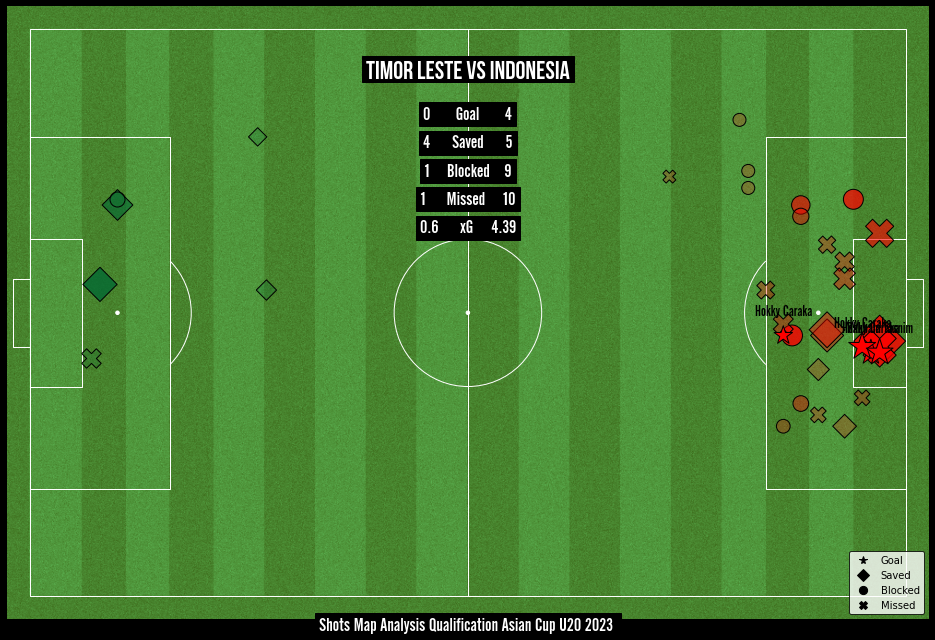

In [116]:
pitch = Pitch(pitch_type = 'wyscout', pitch_color='grass', line_color='white', linewidth=1, goal_type = 'box',stripe=True)
fig,ax = pitch.draw(figsize = (16,9))
fig.set_facecolor('#000000')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Saved Shot berdasarkan nilai xG
sc1 = plt.scatter(df_home_saved['x'],df_home_saved['y'], 
            s = ((df_home_saved['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_saved['xG'],
            edgecolor = 'black',
            marker = 'D')
sc2 = plt.scatter(df_away_saved['x'],df_away_saved['y'], 
            s = ((df_away_saved['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_saved['xG'],
            edgecolor = 'black',
            marker = 'D')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Blocked Shot berdasarkan nilai xG
sc3 = plt.scatter(df_home_block['x'],df_home_block['y'], 
            s = ((df_home_block['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_block['xG'],
            edgecolor = 'black',      
            marker = 'o')
sc4 = plt.scatter(df_away_block['x'],df_away_block['y'], 
            s = ((df_away_block['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_block['xG'],
            edgecolor = 'black',
            marker = 'o')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Miss Shot berdasarkan nilai xG
sc5 = plt.scatter(df_home_miss['x'],df_home_miss['y'], 
            s = ((df_home_miss['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_miss['xG'],
            edgecolor = 'black',
            marker = 'X')

sc6 = plt.scatter(df_away_miss['x'],df_away_miss['y'], 
            s = ((df_away_miss['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_miss['xG'],
            edgecolor = 'black',
            marker = 'X')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Goal berdasarkan nilai xG 
sc7 = plt.scatter(df_home_goal['x'],df_home_goal['y'], 
            s = (df_home_goal['xG'] * 1900) + 150,
            c = home_color,
            edgecolor = 'black',
            marker = '*')

sc8 = plt.scatter(df_away_goal['x'],df_away_goal['y'], 
            s = ((df_away_goal['xG'] * 1900) + 150),
            c = away_color,
            edgecolor = 'black',
            marker = '*')

#Text Tambahan
ax.text(x=50, y=7, s='Timor Leste Vs Indonesia',  
        size=25, fontproperties=font_1.prop, color='white', backgroundcolor = '#000000' , va='center', ha='center')

ax.text(x=50, y=15, s='{}       Goal       {}'.format(cnt_goal_away,cnt_goal_home), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=20, s='{}      Saved      {}'.format(cnt_saved_away,cnt_saved_home), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=25, s='{}     Blocked    {}'.format(cnt_blocked_away,cnt_blocked_home), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=30, s='{}      Missed     {}'.format(cnt_missed_away,cnt_missed_home), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=35, s='{}      xG     {}'.format(xG_away_all_event,xG_home_all_event), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=105, s='Shots Map Analysis Qualification Asian Cup U20 2023 ',
        size=18, fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

# Legends
goal = Line2D([0], [0], marker='*', markersize=np.sqrt(30), color='black', linestyle='None')
saved = Line2D([0], [0], marker='D', markersize=np.sqrt(30), color='black', linestyle='None')

blocked = Line2D([0], [0], marker='o', markersize=np.sqrt(30), color='black', linestyle='None')
missed = Line2D([0], [0], marker='X', markersize=np.sqrt(30), color='black', linestyle='None')

plt.legend([goal, saved, blocked, missed], ['Goal', 'Saved', 'Blocked', "Missed"], loc="lower right", 
           markerscale=1.5, scatterpoints=1, fontsize=10, facecolor = '#fefefe', edgecolor = '#000000')

# Text annotation untuk pencetak Gol
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i], y1[i] + 5.5),c='black',size=14, fontproperties=font_2.prop, ha='center')
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i], y[i] - 3.5),c='black',size=14, fontproperties=font_2.prop, ha='center')

# #Save Image
plt.savefig("IndonesiaVSTimorleste.png", bbox_inches = "tight", dpi = 400)